### Amira Muhammad Fareed 43741

### Eslam Medhat Mahrous 43735

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [2]:
img1 = mpimg.imread("image2_folder/Square-circle.png",1)
img2 = mpimg.imread("image2_folder/cameraman.png",1)
img3 = mpimg.imread("image2_folder/lady.png",1)
img4 = mpimg.imread("image2_folder/Square-circle.png",1)
img5 = mpimg.imread("image2_folder/Circle.png",1)
img6 = mpimg.imread("image2_folder/cameraman.png",1)
img7 = mpimg.imread("image2_folder/Circle_and_Lines.png",1)
img8_1 = mpimg.imread("image2_folder/morning.jpg",1)
img8_2 = mpimg.imread("image2_folder/morning1.jpg",1)
img9 = mpimg.imread("image2_folder/Dog.png",0)

# 1)

In [3]:
square_kernel = np.ones((11,11), np.uint8)
img_dilation1_1 = cv2.dilate(img1, square_kernel, iterations=1)
retval=cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (11,11))
img_dilation1_2 = cv2.dilate(img1, retval, iterations=1)

Original Image


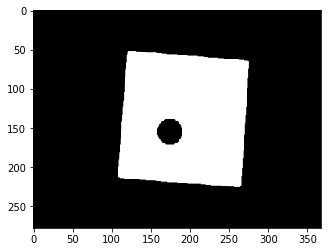

structuring Square


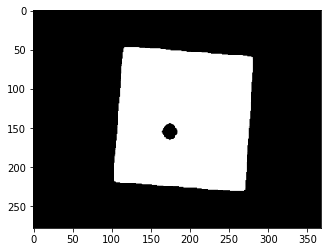

structuring Circle


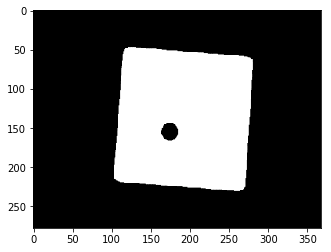

In [4]:
print("Original Image")
plt.imshow(img1)
plt.show()
print("structuring Square")
plt.imshow(img_dilation1_1)
plt.show()
print("structuring Circle")
plt.imshow(img_dilation1_2)
plt.show()

When Using the Square structuring element the hole gets smaller but with sharp edges, on the other hand when Using the circle element the hole also gets smaller but with smoother, circle shaped edges centered around the anchor of this element.

# 2)

Original Image


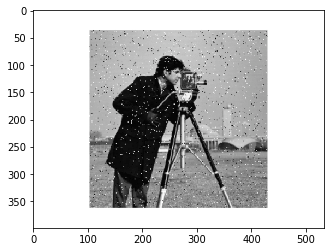

cameraman-denoised


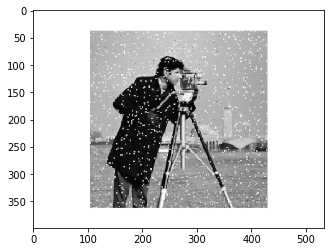

In [5]:
kernel2 = np.ones((2,2), np.uint8)
img_dilation2 = cv2.dilate(img2, kernel2, iterations=1)
print("Original Image")
plt.imshow(img2)
plt.show()
print("cameraman-denoised")
plt.imshow(img_dilation2)
plt.show()

# 3)

Original Image


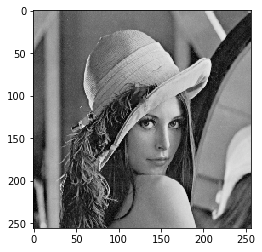

lady-edge


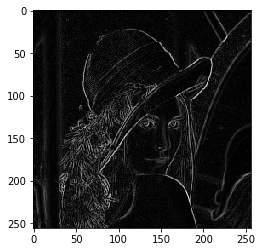

In [6]:
kernel3 = np.ones((3,3), np.uint8)
img_dilation3 = cv2.dilate(img3, kernel3, iterations=1)
img3_out = img_dilation3 - img3
print("Original Image")
plt.imshow(img3)
plt.show()
print("lady-edge")
plt.imshow(img3_out)
plt.show()

# 4)

Original Image


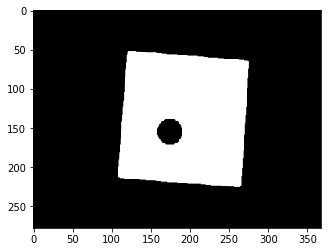

structuring Square


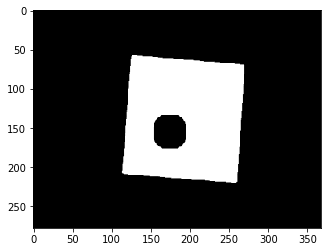

structuring Circle


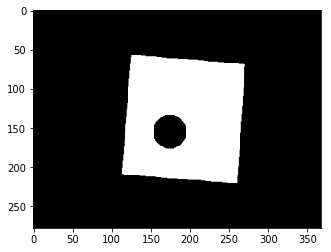

In [7]:
square_kernel4 = np.ones((11,11), np.uint8)
img_erosion4_1 = cv2.erode(img4, square_kernel4, iterations=1)
retval4=cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (11,11))
img_erosion4_2 = cv2.erode(img1, retval4, iterations=1)

print("Original Image")
plt.imshow(img4)
plt.show()
print("structuring Square")
plt.imshow(img_erosion4_1)
plt.show()
print("structuring Circle")
plt.imshow(img_erosion4_2)
plt.show()

When Using the Square structuring element the hole gets bigger but with sharp edges, on the other hand when Using the circle element the hole also gets bigger but with smoother, circle shaped edges centered around the anchor of this element.

# 5)

Original Image


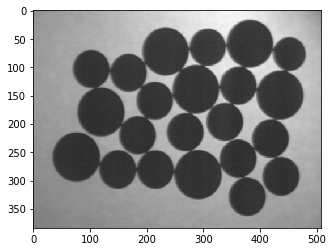

circle-erode


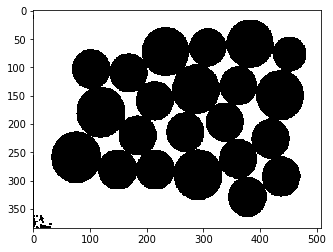

In [8]:
kernel5 = np.ones((3,3), np.uint8)
ret,thresh = cv2.threshold(img5,127,255,cv2.THRESH_BINARY)
img_erosion5 = cv2.erode(thresh, kernel5, iterations=1)

print("Original Image")
plt.imshow(img5)
plt.show()
print("circle-erode")
plt.imshow(img_erosion5)
plt.show()


# 6)

Original Image


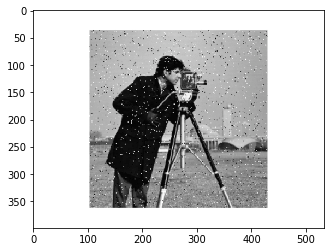

cameraman erode


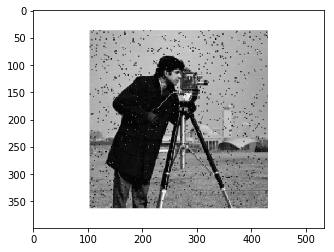

In [9]:
kernel6 = np.ones((2,2), np.uint8)
img_erosion6 = cv2.erode(img6, kernel6, iterations=1)
print("Original Image")
plt.imshow(img6)
plt.show()
print("cameraman erode")
plt.imshow(img_erosion6)
plt.show()

Salt noise can be eliminated by applying Erusion operation to any image, Pepper noise can be eliminated by applying Dilation opretaion to any image.

# 7)

a)

Original Image


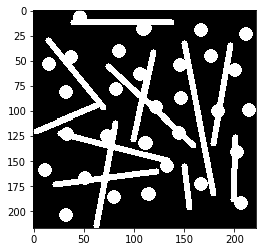

circle_png


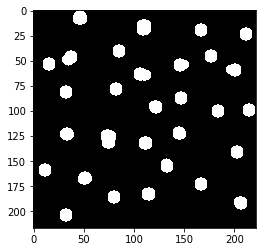

In [10]:
retval7_1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (11,11))
opening7_1 = cv2.morphologyEx(img7, cv2.MORPH_OPEN, retval7_1)
print("Original Image")
plt.imshow(img7)
plt.show()
print("circle_png")
plt.imshow(opening7_1)
plt.show()
circle_img = opening7_1

Using circle shaped kernel to extract a circle, as when using rect, kernel we dont get circles . The size of the kernel determines the size of circles extracted, if the size is relatively small, circles will be extracted from the lines not just the existing circles, however if the size is relatively big you will miss some of the real circles

Original Image


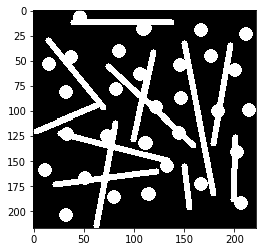

Lines_PNG


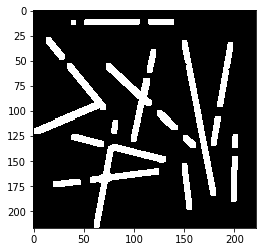

In [11]:
kernel7_2 = np.ones((3,3), np.uint8)
retval7_2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (5,5))
img7_out = img7 - cv2.erode(circle_img, retval7_2, iterations=1)
img_erosion7 = cv2.erode(img7_out, retval7_2, iterations=1)
img_dilation7 = cv2.dilate(img_erosion7, np.ones((5,5), np.uint8), iterations=1)


print("Original Image")
plt.imshow(img7)
plt.show()
print("Lines_PNG")
plt.imshow(img_dilation7)
plt.show()
lines_img = img_dilation7

b)

In [12]:
gray = cv2.cvtColor(circle_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
edged = cv2.Canny(blurred, 20, 140)
(_, contours, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("no. of circules = " + str(len(contours)))

no. of circules = 31


In [13]:
lines_img2 = cv2.dilate(lines_img, np.ones((5,5), np.uint8), iterations=2)
gray = cv2.cvtColor(lines_img2, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
edged = cv2.Canny(blurred, 20, 140)

(_, contours, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("no. of Lines = " + str(len(contours)))

no. of Lines = 11


# 8)

In [14]:
fgbg = cv2.createBackgroundSubtractorMOG2()
fgmask = fgbg.apply(img8_1)

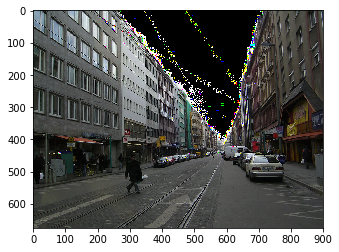

In [15]:
fgmask = img8_1 - img8_2
plt.imshow(fgmask)
plt.show()

# 9)

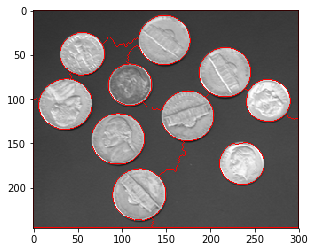

In [16]:
img8_1 = cv2.imread('image2_folder/coins.png')
gray = cv2.cvtColor(img8_1,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img8_1,markers)
img8_1[markers == -1] = [255,0,0]
plt.imshow(img8_1)
plt.show()

# BONUS 2

dog_skelton


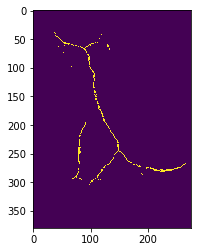

In [17]:
img_dog = cv2.imread('image2_folder/Dog.png',0)
size = np.size(img_dog)
skel = np.zeros(img_dog.shape,np.uint8)
 
ret,img_dog = cv2.threshold(img_dog,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
done = False
 
while( not done):
    eroded = cv2.erode(img_dog,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img_dog,temp)
    skel = cv2.bitwise_or(skel,temp)
    img_dog = eroded.copy()
 
    zeros = size - cv2.countNonZero(img_dog)
    if zeros==size:
        done = True
        
cv2.imshow("skel",skel)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("dog_skelton")
plt.imshow(skel)
plt.show()

girl_skelton


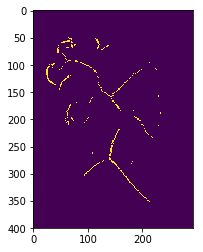

In [18]:
img_girl = cv2.imread('image2_folder/Girl.png',0)
size = np.size(img_girl)
skel = np.zeros(img_girl.shape,np.uint8)
 
ret,img_girl = cv2.threshold(img_girl,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
done = False
 
while( not done):
    eroded = cv2.erode(img_girl,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img_girl,temp)
    skel = cv2.bitwise_or(skel,temp)
    img_girl = eroded.copy()
 
    zeros = size - cv2.countNonZero(img_girl)
    if zeros==size:
        done = True
        
cv2.imshow("skel",skel)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("girl_skelton")
plt.imshow(skel)
plt.show()

HotBallon skelton


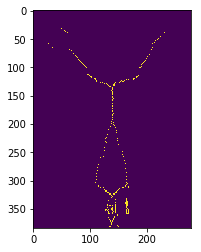

In [19]:
img_balloon = cv2.imread('image2_folder/HotBallon.png',0)
size = np.size(img_balloon)
skel = np.zeros(img_balloon.shape,np.uint8)
 
ret,img_balloon = cv2.threshold(img_balloon,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
done = False
 
while( not done):
    eroded = cv2.erode(img_balloon,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img_balloon,temp)
    skel = cv2.bitwise_or(skel,temp)
    img_balloon = eroded.copy()
 
    zeros = size - cv2.countNonZero(img_balloon)
    if zeros==size:
        done = True
        
cv2.imshow("skel",skel)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("HotBallon skelton")
plt.imshow(skel)
plt.show()

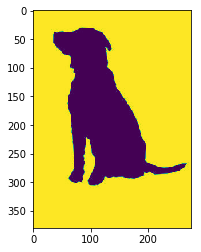

Center of mass = 119 , 179
area = 26684


In [20]:
img = cv2.imread('image2_folder/Dog.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
area = cv2.contourArea(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
plt.imshow(img)
plt.show()
print("Center of mass = %d , %d"%(cx,cy))
print("area = %d"%(area))

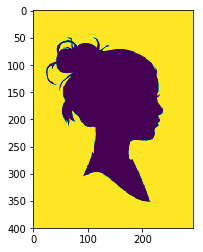

Center of mass = 92 , 304
area = 2


In [21]:
img = cv2.imread('image2_folder/Girl.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
area = cv2.contourArea(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
plt.imshow(img)
plt.show()
print("Center of mass = %d , %d"%(cx,cy))
print("area = %d"%(area))

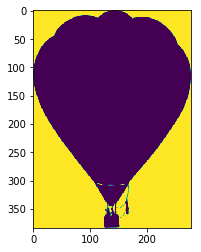

Center of mass = 160 , 359
area = 2


In [22]:
img_HB = cv2.imread('image2_folder/HotBallon.png',0)
ret,thresh = cv2.threshold(img_HB,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
area_HB = cv2.contourArea(cnt)
cx_HB = int(M['m10']/M['m00'])
cy_HB = int(M['m01']/M['m00'])
plt.imshow(img_HB)
plt.show()
print("Center of mass = %d , %d"%(cx_HB,cy_HB))
print("area = %d"%(area_HB))